In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.optimize import curve_fit
from scipy import stats
mobile = np.load('/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/mobile/Tokyostation/Tokyostation_2021.npy')
twitter = np.load('/home/is/shuntaro-o/dev/compare_population_and_tweet_number/data/twitter/Tokyostation_2021/Tokyostation_3zi_2021.npy')

In [2]:
mobile_flatten = mobile.flatten()
twitter_flatten = twitter.flatten()

In [3]:
twitter_flatten[459] = twitter_flatten[458]

In [4]:
mobile_flatten_stand =preprocessing.scale(mobile_flatten)
twitter_flatten_stand = preprocessing.scale(twitter_flatten)

In [5]:
mobile_flatten_stand

array([-0.97654877, -0.98143708, -0.98279775, ..., -0.75793551,
       -0.8287656 , -0.88077318])

In [6]:
twitter_flatten_stand

array([ 0.12144348, -0.94051351, -1.17650395, ...,  1.18340048,
        0.59342437,  0.2394387 ])

In [7]:
day_list_long = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
day_list_short = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30']
day_list_Feb = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28']
hour_list = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
x_label = []
for month in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    if month in ['01', '03', '05', '07', '08','10', '12']:
        day_list = day_list_long
    elif month == '02':
        day_list = day_list_Feb
    else:
        day_list = day_list_short
    for day in day_list:
        for hour in range(0,24):
            hour = str(hour)
            key = int('21'+ month + day + hour)
            key = str(key)
            x_label.append(key)

In [8]:
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Scatter(x=x_label, y=mobile_flatten_stand, name='mobile'),
    go.Scatter(x=x_label, y=twitter_flatten_stand, name="twitter"),
    #go.Scatter(x=x_label, y=twitter_flatten_stand - mobile_flatten_stand, name="diff")
])
fig.show()

In [9]:
from scipy import fftpack
import numpy as np
import matplotlib.pyplot as plt


class Spectra(object):
    def __init__(self, t, f, time_unit):
        """
         - t : 時間軸の値
         - f : データの値
         - time_unit : 時間軸の単位
         - Po : パワースペクトル密度
        """
        assert t.size == f.size  # 時間軸の長さとデータの長さが同じであることを確認する
        assert np.unique(np.diff(t)).size == 1  # 時間間隔が全て一定であることを確認する
        self.time_unit = time_unit   # 時間の単位
        T = (t[1] - t[0]) * t.size
        self.period = 1.0 / (np.arange(t.size / 2)[1:] / T)

        # パワースペクトル密度を計算
        f = f - np.average(f)         # 平均をゼロに。
        F = fftpack.fft(f)                          # 高速フーリエ変換
        self.Po = np.abs(F[1:(t.size // 2)]) ** 2 / T

    def draw_with_time(self, threshold=10**4,  print_flg=True,fsizex=8, fsizey=6,):
        # 横軸に時間をとってパワースペクトル密度をプロット
        fig, ax = plt.subplots(figsize=(fsizex, fsizey))   # 図のサイズの指定
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_xlabel(self.time_unit)
        ax.set_ylabel("Power Spectrum Density")
        ax.plot(self.period, self.Po)
        if print_flg:   # パワースペクトル密度の値がthresholdより大きい部分に線を引き、周期の値を記述する
            dominant_periods = self.period[self.Po > threshold]
            print(dominant_periods, self.time_unit +
                  ' components are dominant!')
            for dominant_period in dominant_periods:
                plt.axvline(x=dominant_period, linewidth=0.5, color='k')
                ax.text(dominant_period, threshold,
                        str(round(dominant_period, 3)))

        return plt

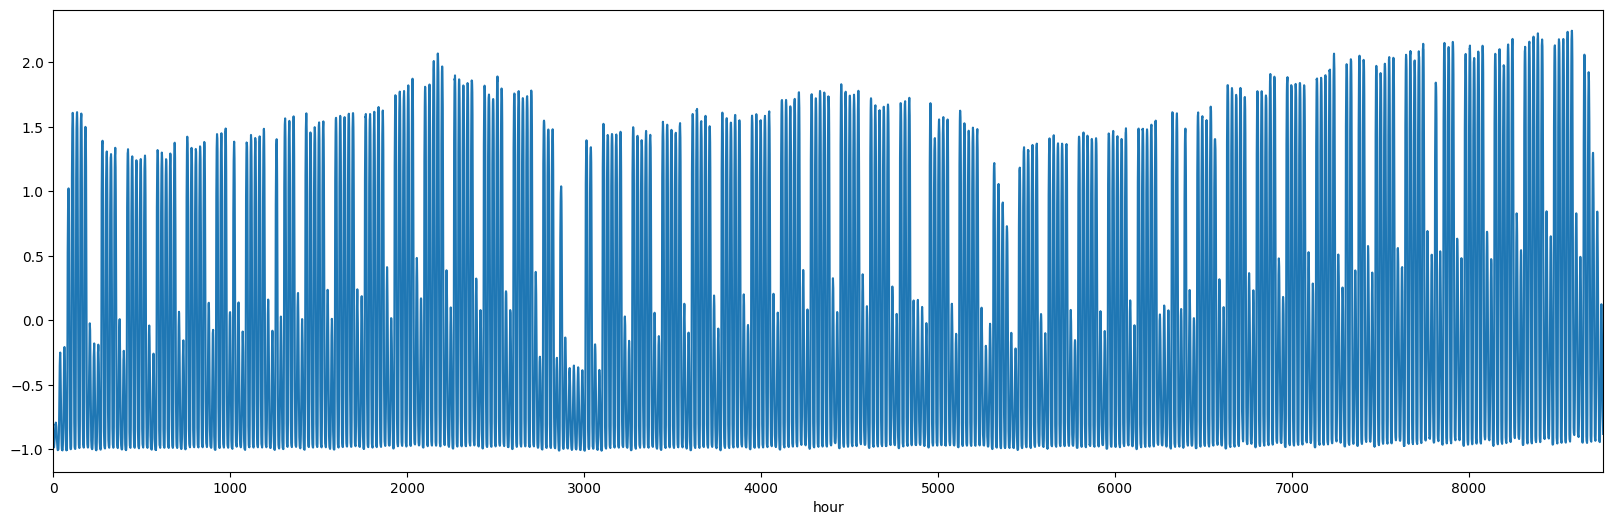

[168.46153846  84.23076923  27.98722045  24.        ] hour components are dominant!


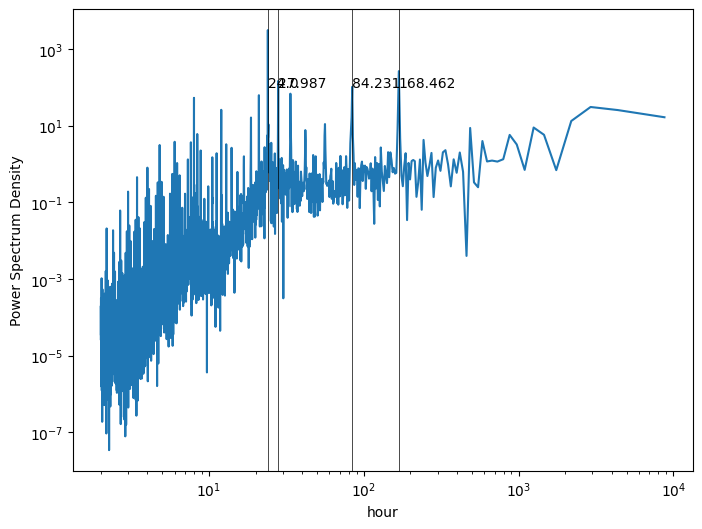

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# 時系列データの作成
# Monthlyデータ30年分(すなわちデータ数は360個)
# 大きな1年(=12ヶ月)周期に加えて緩やかな10年(=120ヶ月)周期、更に各時刻に微小なノイズ
N = 8760
t = np.arange(0, N)
f = mobile_flatten_stand


# 元の時系列の描画
plt.figure(figsize=(20, 6))
plt.plot(t, f)
plt.xlim(0, N)
plt.xlabel('hour')
plt.show()

# 卓越している周期の描画
spectra = Spectra(t, f, 'hour')
plt = spectra.draw_with_time(threshold=10**2)
plt.show()

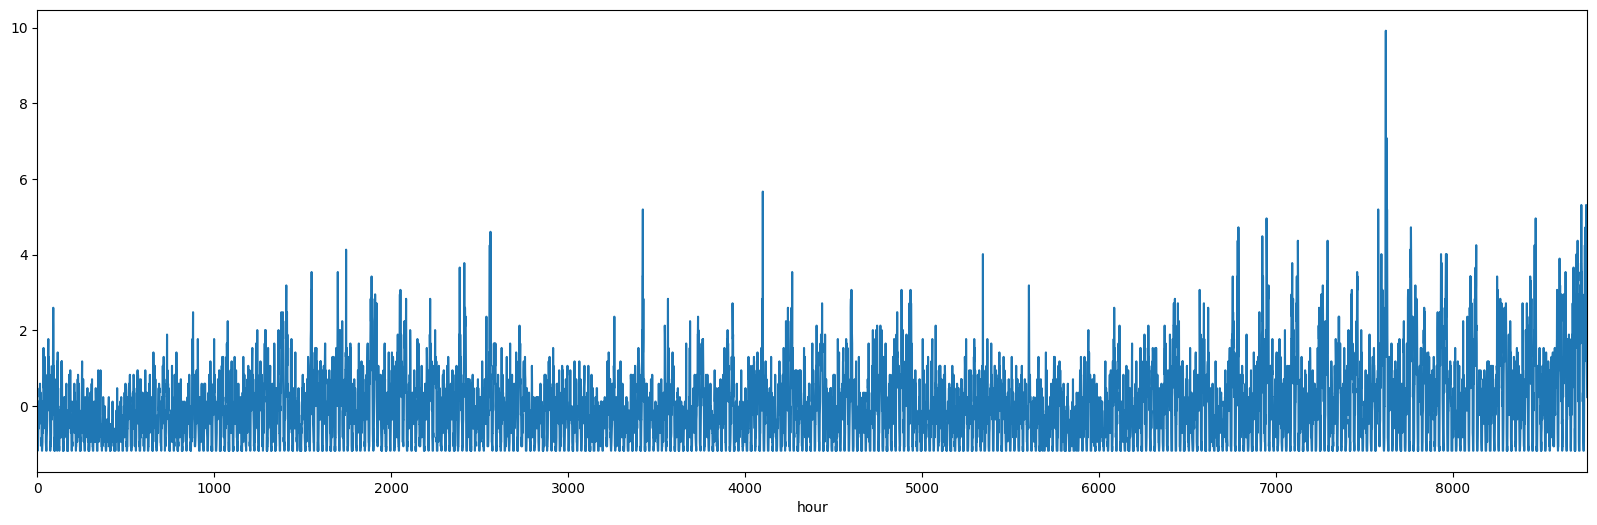

[168.46153846  24.          12.        ] hour components are dominant!


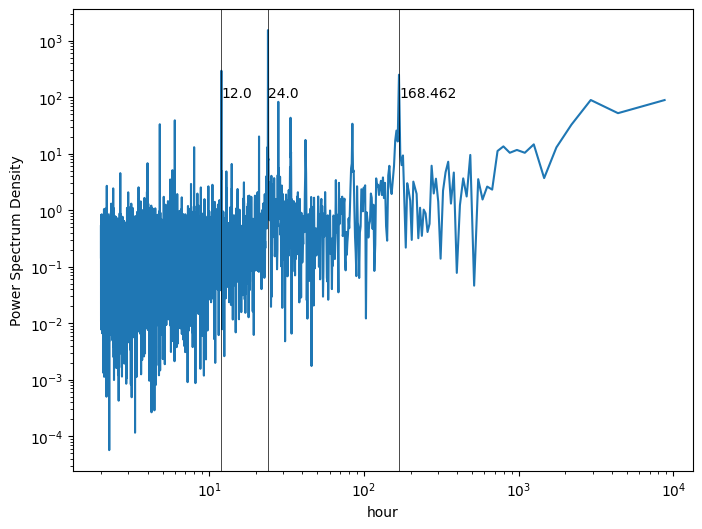

In [17]:
# 時系列データの作成
# Monthlyデータ30年分(すなわちデータ数は360個)
# 大きな1年(=12ヶ月)周期に加えて緩やかな10年(=120ヶ月)周期、更に各時刻に微小なノイズ
N = 8760
t = np.arange(0, N)
f = twitter_flatten_stand


# 元の時系列の描画
plt.figure(figsize=(20, 6))
plt.plot(t, f)
plt.xlim(0, N)
plt.xlabel('hour')
plt.show()

# 卓越している周期の描画
spectra = Spectra(t, f, 'hour')
plt = spectra.draw_with_time(threshold=10**2)
plt.show()

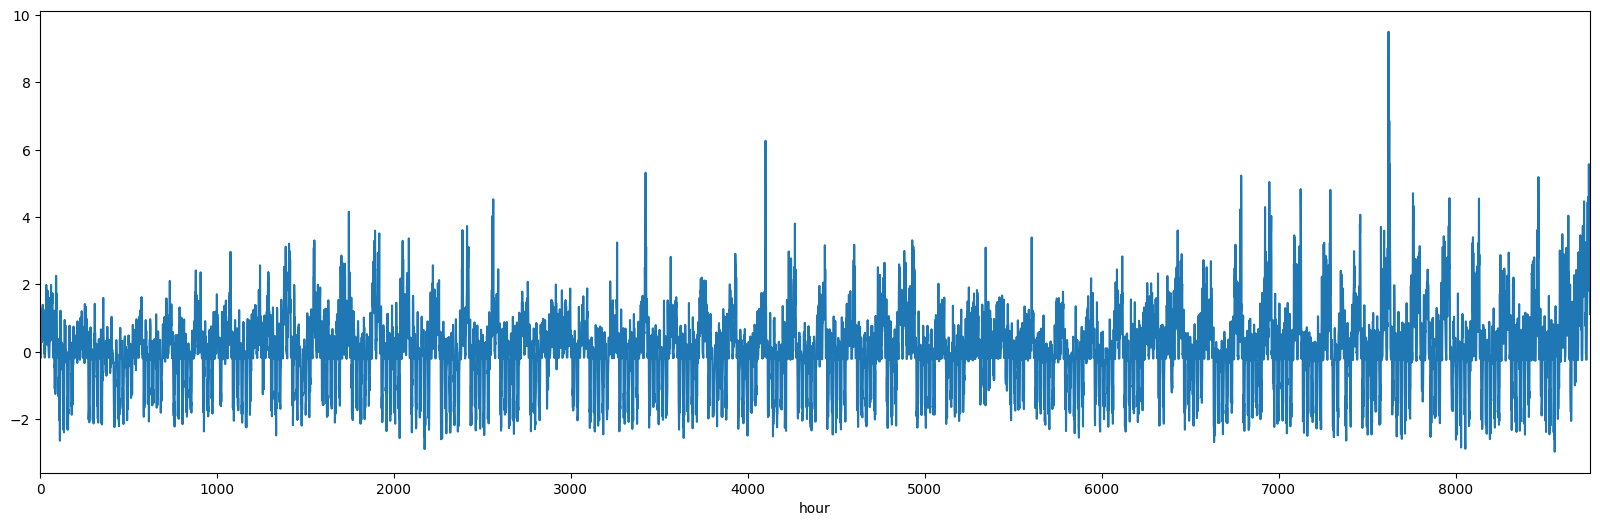

[] hour components are dominant!


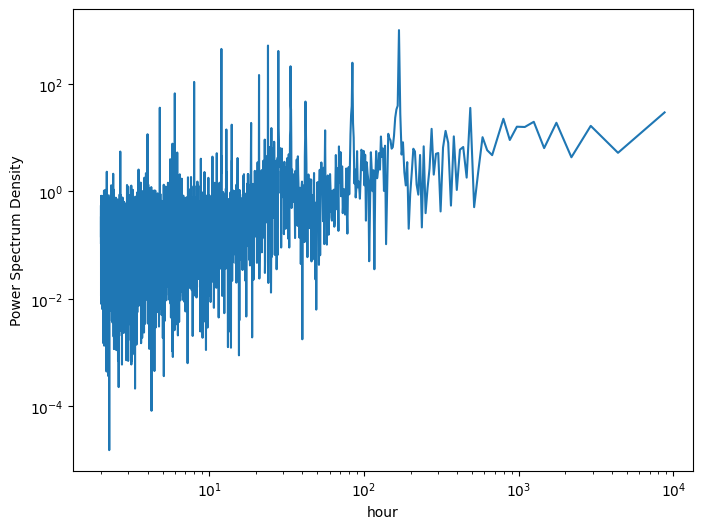

In [12]:
N = 8760
t = np.arange(0, N)
f = twitter_flatten_stand - mobile_flatten_stand


# 元の時系列の描画
plt.figure(figsize=(20, 6))
plt.plot(t, f)
plt.xlim(0, N)
plt.xlabel('hour')
plt.show()

# 卓越している周期の描画
spectra = Spectra(t, f, 'hour')
plt = spectra.draw_with_time(threshold=10**4)
plt.show()

In [13]:
class Spectra_compare(object):
    def __init__(self, t, f_1, f_2, time_unit):
        """
         - t : 時間軸の値
         - f : データの値
         - time_unit : 時間軸の単位
         - Po : パワースペクトル密度
        """
        assert t.size == f_1.size  # 時間軸の長さとデータの長さが同じであることを確認する
        assert t.size == f_2.size
        assert np.unique(np.diff(t)).size == 1  # 時間間隔が全て一定であることを確認する
        self.time_unit = time_unit   # 時間の単位
        T = (t[1] - t[0]) * t.size
        self.period = 1.0 / (np.arange(t.size / 2)[1:] / T)

        # パワースペクトル密度を計算
        f_1 = f_1 - np.average(f_1)         # 平均をゼロに。
        F = fftpack.fft(f_1)                          # 高速フーリエ変換
        self.Po_1 = np.abs(F[1:(t.size // 2)]) ** 2 / T

        f_2 = f_2 - np.average(f_2)         # 平均をゼロに。
        F = fftpack.fft(f_2)                          # 高速フーリエ変換
        self.Po_2 = np.abs(F[1:(t.size // 2)]) ** 2 / T

        self.diff_Po = self.Po_1 - self.Po_2

    def draw_with_time(self, threshold=10**4,  print_flg=True,fsizex=20, fsizey=15):
        # 横軸に時間をとってパワースペクトル密度をプロット
        fig= plt.figure(figsize=(fsizex, fsizey))   # 図のサイズの指定
        ax1 = fig.add_subplot(3, 1, 1)
        ax2 = fig.add_subplot(3, 1, 2)
        ax3 = fig.add_subplot(3, 1, 3)

        ax1.set_yscale('log')
        ax1.set_xscale('log')
        ax1.set_xlabel(self.time_unit)
        ax1.set_ylabel("Power Spectrum Density")
        ax1.plot(self.period, self.Po_1)
        if print_flg:   # パワースペクトル密度の値がthresholdより大きい部分に線を引き、周期の値を記述する
            dominant_periods = self.period[self.Po_1 > threshold]
            print(dominant_periods, self.time_unit +
                  ' components are dominant!')
            for dominant_period in dominant_periods:
                plt.axvline(x=dominant_period, linewidth=0.5, color='k')
                ax1.text(dominant_period, threshold,
                        str(round(dominant_period, 3)))
                
        ax2.set_yscale('log')
        ax2.set_xscale('log')
        ax2.set_xlabel(self.time_unit)
        ax2.set_ylabel("Power Spectrum Density")
        ax2.plot(self.period, self.Po_2)
        if print_flg:   # パワースペクトル密度の値がthresholdより大きい部分に線を引き、周期の値を記述する
            dominant_periods = self.period[self.Po_2 > threshold]
            print(dominant_periods, self.time_unit +
                  ' components are dominant!')
            for dominant_period in dominant_periods:
                plt.axvline(x=dominant_period, linewidth=0.5, color='k')
                ax2.text(dominant_period, threshold,
                        str(round(dominant_period, 3)))

        ax3.set_yscale('log')
        ax3.set_xscale('log')
        ax3.set_xlabel(self.time_unit)
        ax3.set_ylabel("Power Spectrum Density")
        ax3.plot(self.period, self.diff_Po)
        if print_flg:   # パワースペクトル密度の値がthresholdより大きい部分に線を引き、周期の値を記述する
            dominant_periods = self.period[self.diff_Po > threshold]
            print(dominant_periods, self.time_unit +
                  ' components are dominant!')
            for dominant_period in dominant_periods:
                plt.axvline(x=dominant_period, linewidth=0.5, color='k')
                ax3.text(dominant_period, threshold,
                        str(round(dominant_period, 3)))

        return plt

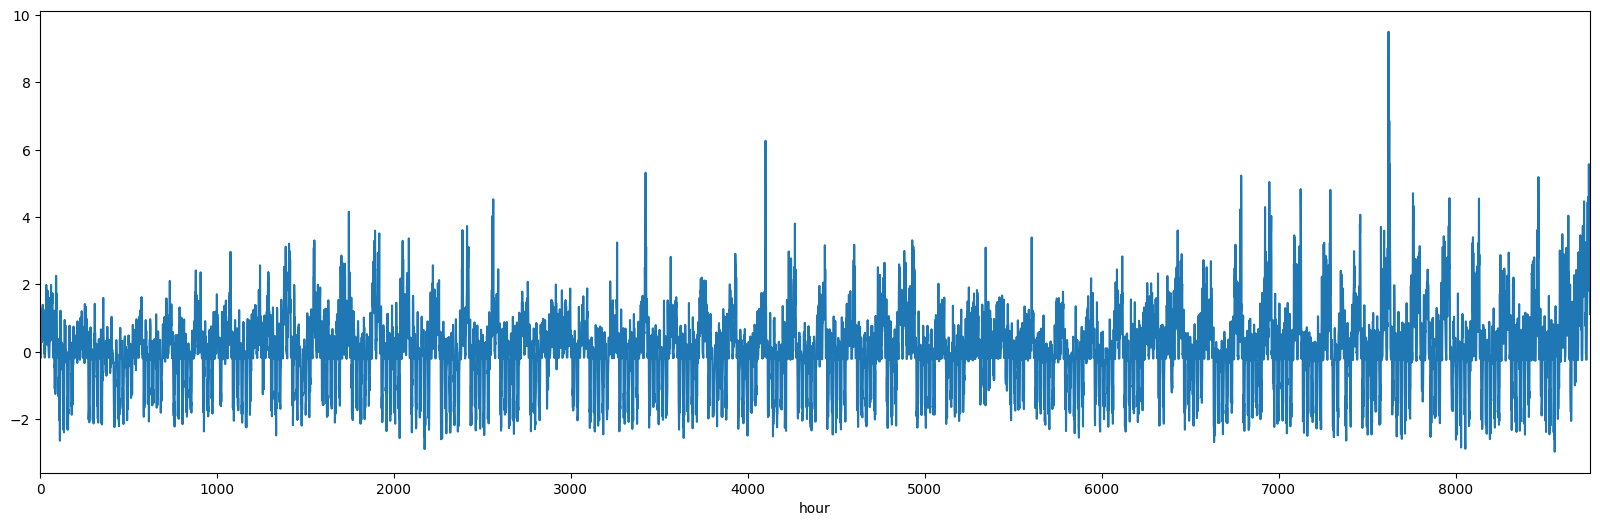

[] hour components are dominant!
[] hour components are dominant!
[] hour components are dominant!


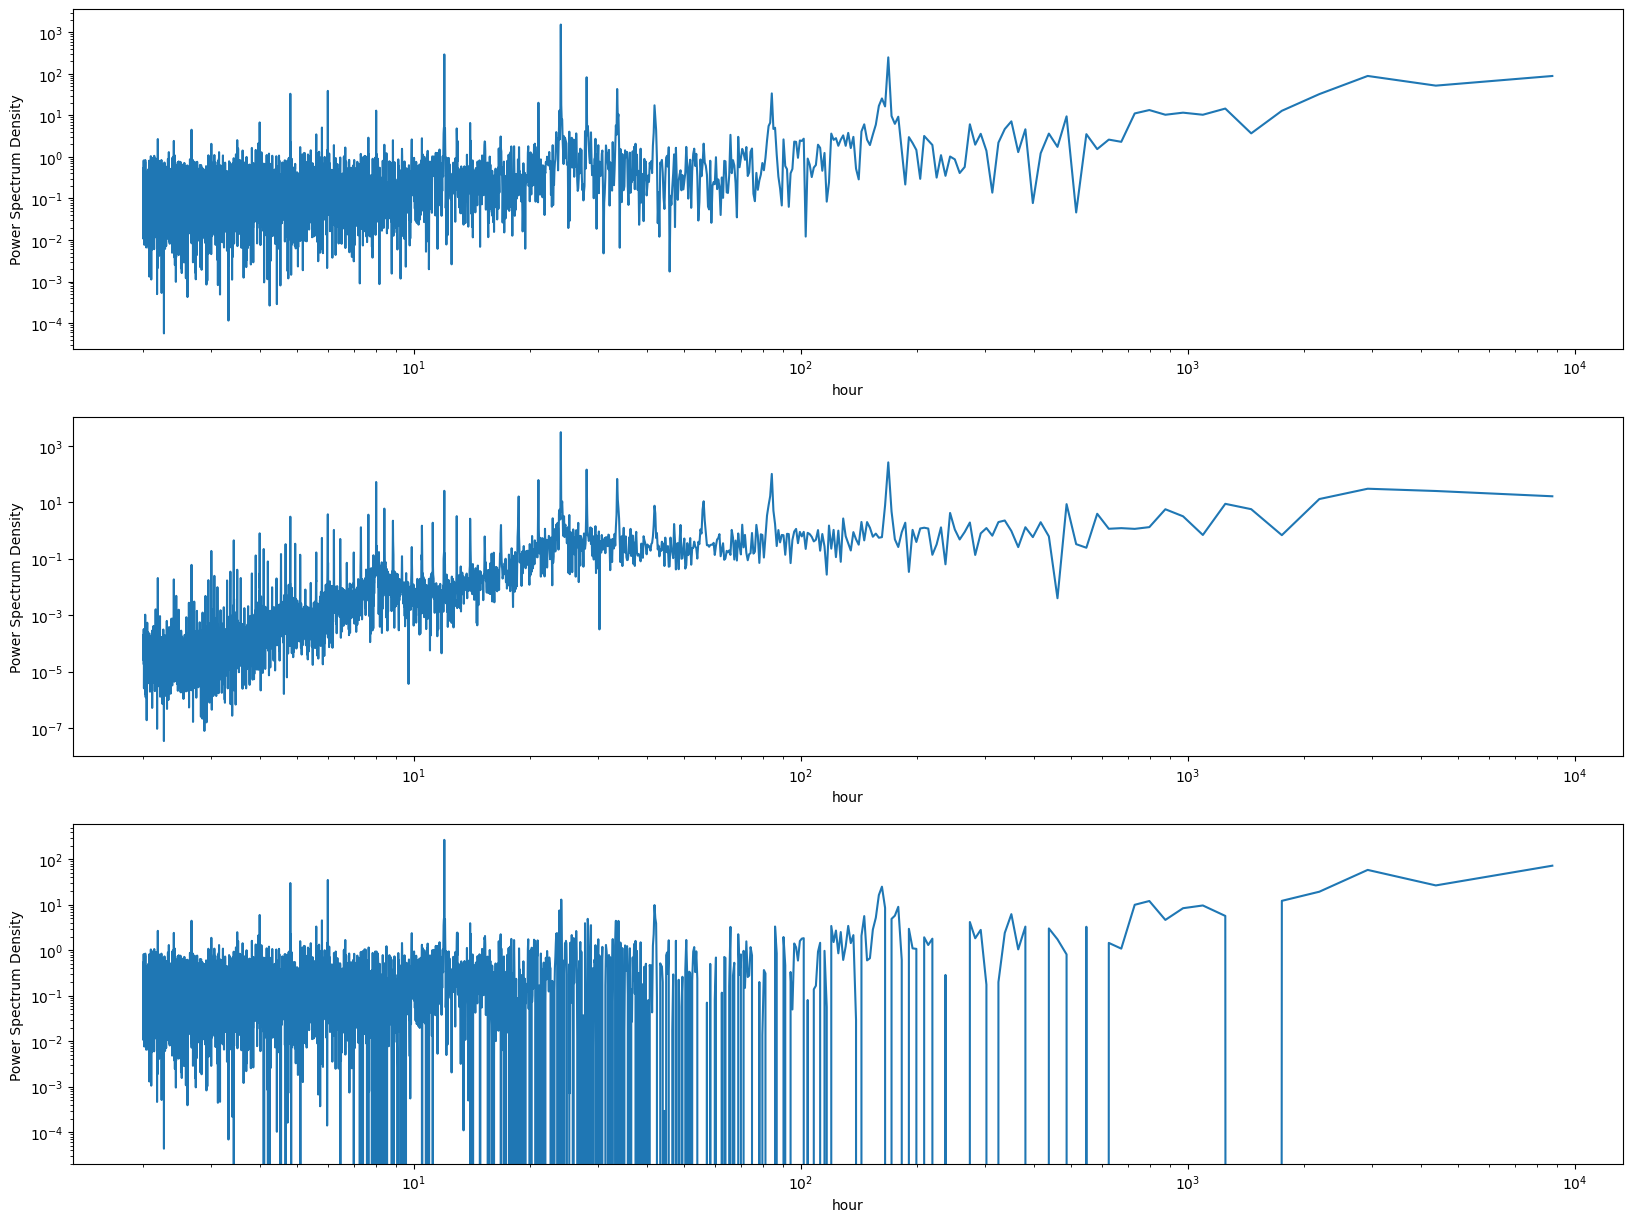

In [14]:
N = 8760
t = np.arange(0, N)
f_1 = twitter_flatten_stand
f_2 = mobile_flatten_stand

# 元の時系列の描画
plt.figure(figsize=(20, 6))
plt.plot(t, f)
plt.xlim(0, N)
plt.xlabel('hour')
plt.show()

# 卓越している周期の描画
spectra = Spectra_compare(t, f_1, f_2,  'hour')
plt = spectra.draw_with_time(threshold=10**4)
plt.show()